### Course : Mathematical Foundations of Data Science
### Course Number: CH5019
Thole Sidhant Pravinkumar (ED17S004)



Importing libraries

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Question 1

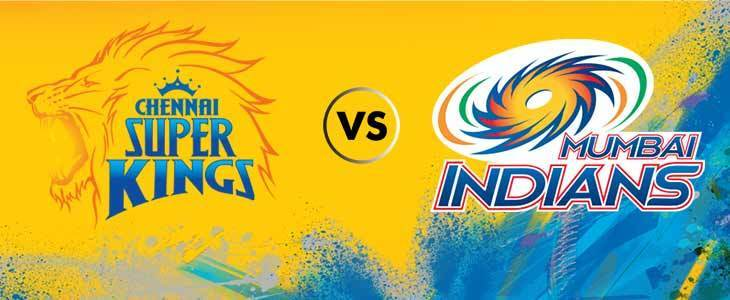

reading data from csv file

In [188]:
data=pd.read_csv('IPL_Twitter_MissingData.csv')

taking a look at values
Q1,Q2 are categorical and others are discrete 

In [189]:
data.head()

,Q1,Q2,X1,X2,X3,X4
0,0.0,0.0,8130.0,4838.0,3623.0,12718.0
1,0.0,0.0,2594.0,3651.0,2323.0,6014.0
2,1.0,1.0,4108.0,12510.0,12127.0,3816.0
3,1.0,0.0,2171.0,NaN,6732.0,1357.0
4,0.0,0.0,4518.0,4326.0,4214.0,6862.0


Defining function which takes data as input and gives out the number samples with atleast one NaN value.

In [190]:
def findnannum(data):
    data=np.asarray(data)
    s=np.isnan(data).any(axis=1);
    count=0;
    for i in range(data.shape[0]):
         if s[i]==True:
            count=count+1;
    return(count)

For question number 1 part i) there are 238 samples which has atleast one NaN.

In [191]:
findnannum(data)

238

Defining the function which takes X (input variables matrix) and y(output) and gives out the coefficients for linear regression
such that y=beta.transpose(X) using least square projection approach

In [192]:
def linfit(X,y):
    b1=np.matmul(np.linalg.inv(np.matmul(np.transpose(X),X)),np.transpose(X))
    betas=np.matmul(b1,y)
    return(betas)

data_with_nan gives takes all samples with atleast one nan
data_with_no_nans dataframe takes all non NaN rows

In [193]:
s=data.isnull().any(axis=1);
data_with_nan=data[s]
data_no_nan=data[~s]

checking out if any sample is left (just to cross check!)

In [194]:
data_with_nan.shape[0]+data_no_nan.shape[0]==data.shape[0]

True

Question 1. part ii) of categories that can be identified using data in which NaN samples are omitted

In [195]:
a=data_no_nan['Q1']==0
b=data_no_nan['Q2']==0
c=data_no_nan['Q1']==1
d=data_no_nan['Q2']==1
print('category 1:{}:no CSK no MI'.format(data_no_nan[a & b ].shape[0]))
print('category 2:{}:no MI but CSK'.format(data_no_nan[b & c ].shape[0]))
print('category 3:{}:both CSK and MI'.format(data_no_nan[c & d ].shape[0]))
print('category 4:{}:no CSK but MI'.format(data_no_nan[a & d ].shape[0]))

category 1:200:no CSK no MI
category 2:175:no MI but CSK
category 3:200:both CSK and MI
category 4:187:no CSK but MI


Defining the function which takes data with no NaNs and give us the data frames in following order

1.data rows with no CSK match but for MI

2.data rows with no MI match but for CSK

3.data rows with no CSK or MI match

4.data rows with CSK vs MI match

In [196]:
def datasplit(data):
    a=data['Q1']==0
    b=data['Q2']==0
    data_no_cs=data[a & ~b]
    data_no_mi=data[b & ~a]
    data_no_csmi=data[a & b]
    data_csmi=data[~a & ~b]
    return(data_no_cs,data_no_mi,data_no_csmi,data_csmi)

Defining the function for splitting the dataframe in X's (inputs) and y's (outputs)
sequentially,fitting the data using linfit (Linear Regression using Ordinary Least Square Approach) as defined earlier in this
code and in output it prints the relation between input and output in x4=beta0  x1+beta1  x2+beta2  x3 format

In [197]:
def datafit(data): 
    X=data.loc[:,'X1':'X3']
    y=data.loc[:,'X4']
    betas=linfit(X,y)
    print('Relationship:X4= ({}) X1+ ({}) X2+ ({}) X3'.format(betas[0],betas[1],betas[2]))

For question number 1 part iii) data used for getting the splits of data for each of the cases mentioned in project statement
is data without nan samples.

In [198]:
data_no_cs,data_no_mi,data_no_csmi,data_csmi=datasplit(data_no_nan)

Fitting the data for case A,caseB,case C,case D,case E as follows:

In [199]:
#fitting the data for case A
datafit(data_no_nan)

Relationship:X4= (1.17052449613) X1+ (0.183252799026) X2+ (-0.218426827072) X3


In [200]:
#fitting the data for case B
datafit(data_no_csmi)

Relationship:X4= (1.16666966794) X1+ (1.66669151117) X2+ (-1.33335293559) X3


In [201]:
#fitting the data for case C
datafit(data_no_cs)

Relationship:X4= (-0.249992698537) X1+ (0.999980859277) X2+ (-0.349990080608) X3


In [202]:
#fitting the data for case D
datafit(data_no_mi)

Relationship:X4= (-0.499981442672) X1+ (-0.666665713919) X2+ (1.74999359304) X3


In [203]:
#fitting the data for case E
datafit(data_csmi)

Relationship:X4= (0.866682714628) X1+ (0.666667952456) X2+ (-0.666668294641) X3


Interestingly when we write this relations we see that when X3 (tweets for Rohit) increases X4 (tweets for Virat) decreases if we kept other tweets constant,as the coefficient of X3 is negative in all cases except the case of No MI matches.


Checking for number of nans in each of the columns

In [204]:
np.isnan(data).sum()

Q1    44
Q2    45
X1    36
X2    55
X3    67
X4    41
dtype: int64

### Analyzing Imputation Strategies

Plotting boxplots of each of the columns so as to get which columns do have outliers so as to take decisions on the imputation

Text(0.5,0,'Number of tweets for Virat Kohli')

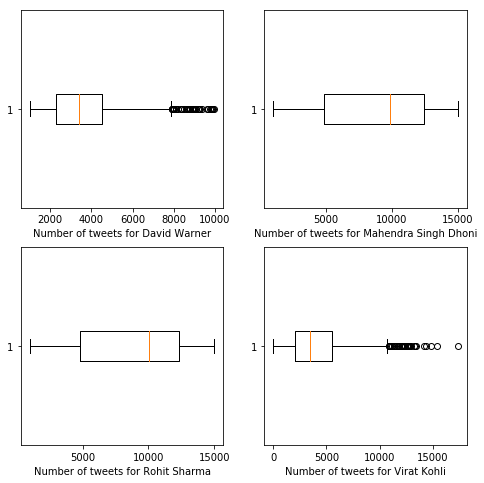

In [205]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.boxplot(data_no_nan.X1,vert=False)
plt.xlabel('Number of tweets for David Warner')

plt.subplot(2,2,2)
plt.boxplot(data_no_nan.X2,vert=False)
plt.xlabel('Number of tweets for Mahendra Singh Dhoni')

plt.subplot(2,2,3)
plt.boxplot(data_no_nan.X3,vert=False)
plt.xlabel('Number of tweets for Rohit Sharma')

plt.subplot(2,2,4)
plt.boxplot(data_no_nan.X4,vert=False)
plt.xlabel('Number of tweets for Virat Kohli')

It is interesting to see that as <b>Virat</b> (RCB) and <b>Warner</b> (SRH)  are not from MI and CSK they both have outliers and their median 
is lower than that of the MS and Rohit <b>(Hitman)</b>
And it is obvious to have lower medians as we are only focussing on days on which atleast either of the team is playing.So the players 
from this team will obviously have large median comparing with others
The outliers are there because there can be days atleast either of RCB or SRH.
If there is outlier which belong to single day then there can be match between SRH and RCB.

### Imputation using median

In this approach we calculated the median of the columns with the help of data which we have in our hand and take those values 
to replace the NaN values.

a. This method do not consider the effect of one variable on other variable (column)

b. The advantage of this method is that it is fast.

c. When there are multiple outliers in data,mean can be affected by those,median is better option in this case as we can see in
above images Virat,David columns are having outliers

Defining function for inputing by median values of corresponding columns
Function gives out imputed data with no nans and input is data with nans

In [206]:
def imputemed(data):
    data1=data.copy()
    col=data1.columns
    for i in col:
        med=data1[i].median()
        for j in range(data1.shape[0]):
            if np.isnan(data1[i][j])==True:
                data1[i][j]=med
    return(data1)
        

In [207]:
#getting data where nans are imputed using median of corresponding columns
data_with_median=imputemed(data)

In [208]:
#validating that the data imputed with median has no nans now
findnannum(data_with_median)

0

In [255]:
data_with_median.to_csv("Median_imputation.csv")

### Imputation using mode

In this approach we calculated the mode (most frequent value) of the columns with the help of data whcih we have in our hand.And take those values to replace the NaN values.

a. This method also do not consider the effect of one variable on other variable (column)

b. The advantage of this method is that it is fast.

c. Imputing with this strategy makes more sense and works efficiently with categorical data.

d. As this is taking most frequent data ,it can create bias in data.

##### e. Let say if certain column have multiple modes then in this strategy imputation is done using the mode which has least absolute distance from median

Defining function for inputing by mode values of corresponding columns
function gives out imputed data with no nans and input is data with nans

In [209]:
def imputemode(data):
    data1=data.copy()
    col=data1.columns
    for i in col:
        mo=data1[i].mode()
        if mo.shape[0]!=1:
            modistance=[]
            me=data1[i].median()
            for t in mo:
                modistance.append(np.abs(t-me))
            mo=mo[modistance.index(min(modistance))]
        for j in range(data1.shape[0]):
            if np.isnan(data1[i][j])==True:
                data1[i][j]=mo
    return(data1)

In [210]:
#getting data where nans are imputed using mode of corresponding columns
data_with_mod=imputemode(data)

In [211]:
#validating that the data imputed with mode has no nans now
findnannum(data_with_mod)

0

In [254]:
data_with_mod.to_csv("Mode_imputation.csv")

### Imputation using mean

In this approach we calculated the mean of the columns with the help of data whcih we have in our hand.And take those values
to replace the NaN values.

a.This method do not consider the effect of one variable on other variable (column)

b.The advantage of this method is that it is fast.

c. As our data have categorical values and descrete values in columns,their average can be float,so as to solve this issue means are rounded up.

d. Rounding up can cause problems when there is categorical data.

e. It can also cause problem if we have lots of outliers in data as from the above box plot Virat and David have lot of outliers.

f. Imputing by mean values may not be good option to choose.

Defining function for inputing by mean values of corresponding columns
function gives out imputed data with no nans and input is data with nans

In [212]:
def imputemean(data):
    data1=data.copy()
    col=data1.columns
    for i in col:
        mea=data1[i].mean()
        for j in range(data1.shape[0]):
            if np.isnan(data1[i][j])==True:
                data1[i][j]=round(mea)
    return(data1)

In [213]:
#getting data where nans are imputed using mean of corresponding columns
data_with_mean=imputemean(data)

In [214]:
#validating that the data imputed with mean has no nans now
findnannum(data_with_mean)

0

In [253]:
data_with_mean.to_csv("Mean_imputation.csv")

### Impute with earlier Sample

1.This method is good for the time series data

2.Let say if the data was actually given in chronological order then it makes sense that people will tweet about player more.
For example If Kohli hits hundred surely people will tweet about him not only on match day but next days too.

3.This can create problems with Q1 and Q2 data as it is rare that teams will have matches in next day it played.(if data is day chronology)

In [215]:
def imputepre(data):
    data1=data.copy()
    col=data1.columns
    for i in col:
        mea=data1[i].mean()
        for j in range(data1.shape[0]):
            if np.isnan(data1[i][j])==True:
                data1[i][j]=data1[i][j-1]
    return(data1)

In [216]:
#getting data where nans are imputed using previous sample of corresponding columns
data_with_pre=imputepre(data)

In [217]:
#validating that the data imputed with previous sample has no nans now
findnannum(data_with_pre)

0

In [252]:
data_with_pre.to_csv("Imputation_previous_sample.csv")

### Imputation with nearest neighbour or K neighbours

1.Distances are calculated between each of the data points with Non nan data points.

2.Values corresponding to nearest neighbour is then substituted.

3.Takes care of relation between variables in some sense.

4.We can also use average of the values corresponding to the K nearest neighbours.

5.Different types of distances can be used.

In [248]:
import math
def nnimpute(data,data_no_nan):
    
    datat=data.copy()
    data_n=data_no_nan.copy()
   
    col=datat.columns
    for i in col:
        mea=datat[i].mean()
        for j in range(datat.shape[0]):
            if np.isnan(datat[i][j])==True:
                datat[i][j]=0
    for i in range(datat.shape[0]):
        if data.iloc[i].isnull().values.any()==True:
            distance=[]
            for j in range(data_n.shape[0]):
            
                x=datat.iloc[i]
                y=data_n.iloc[j]
                distance.append(math.sqrt(sum([(a - b) ** 2 for a, b in zip(x, y) if int(a) & int(b)!=0])))
            
            for tk in col:
                if datat[tk][i]==0:
                    datak=data_n.copy()
                    datak.index=np.arange(data_n.shape[0])
                    datat[tk][i]=datak[tk][distance.index(min(distance))]
    return(datat)

In [274]:
#getting data where nans are imputed using nearest sample of corresponding columns

data_with_nn=nnimpute(data,data_no_nan)

In [277]:
#validating that the data imputed with nearest sample has no nans now
findnannum(data_with_nn)

0

In [276]:
data_with_nn.to_csv("Nearest_neighbour_imputation.csv")

There are many more different types of imputation methods available:
1.Random Imputation

In which we can impute nan with any value from that column

2.Regression Imputation

Where we can split data with nan as test dataset and without nans as training datset.And we can predict the nans using model which is build.
This can be tedious and time taking if multiple columns have nans in it.

Regression model choice can be Linear,ANN or so on.

### Question 2 (Credit Card Fraud Detection)

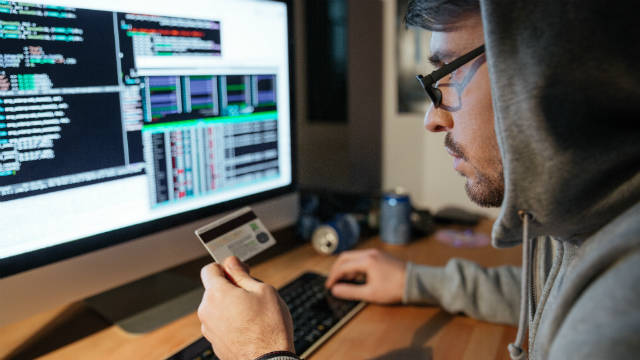

In [218]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC as linsvc

In [219]:
#Reading the data
data1=pd.read_csv('q2_data_matrix.csv',header=None)
labels=pd.read_csv('q2_labels.csv',header=None)

Since the data is multi dimensional we cannot plot it.So as to get idea how the data can be classified in transformed space with less error we plot the Principal components 

In [220]:
PC=PCA(n_components=2)
PC.fit(data1)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [221]:
data_pc=PC.transform(data1)

In [222]:
data_PCA=np.concatenate((data_pc,labels),axis=1)

In [223]:
data_PCA=pd.DataFrame(data_PCA)

In [224]:
data_1=data_PCA[data_PCA[2]==1]
data_0=data_PCA[data_PCA[2]==0]

label 1 data are given by green dots
label 2 data are given by red dots

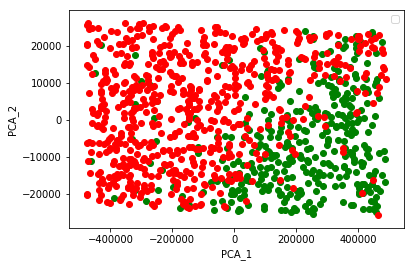

In [225]:
plt.figure()
plt.scatter(data_1[0],data_1[1],color='green')
plt.xlabel('PCA_1')
plt.hold(True)
plt.ylabel('PCA_2')
plt.legend('label_0','label_1')
plt.scatter(data_0[0],data_0[1],color='red')
plt.show()

Scaling up the data is important in svm algorithm as this algorithm depends on the distances (for example margin)
We are normalizing the data using sklearn Standard scaler which converts convert data in standard normal data

In [226]:
scaler=StandardScaler()
X=data1[[0,1,2,3,4]]
scaler.fit(X)
X=scaler.transform(X)
y=labels

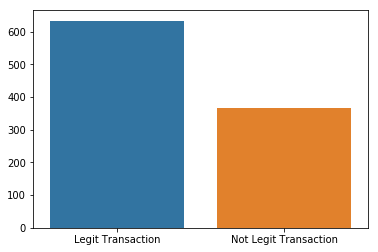

In [227]:
sns.barplot(x=['Legit Transaction','Not Legit Transaction'],y=[(labels.loc[:,0]==0).sum(),(labels.loc[:,0]==1).sum()])

Data seem to have more of legit transactions than that of the non legit transactions!!
We have to be cautious while splitting the data in training and testing!!

Splitting dataset for training and testing

In [228]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42)

Choosing the best hyperparameter using Grid Search where we are checking each parameter combination and doing cross validation,
this will give out the best hyper paramter combination from grid.

Training data with Linear SVC with Hinge loss this function is similar like SVC with kernel type as Linear but has more flexible
options

In [229]:
#hyperparameter tuning for Linear Kernel
C = [0.0001,0.001,0.01,0.1,1,10,100]
grid = {'C':C}
grdtest = GridSearchCV(linsvc(),grid,cv=5)
grdtest.fit(X_train, y_train)
print grdtest.best_params_

{'C': 0.001}


In [230]:
model=linsvc(C=0.001)
model.fit(X_train,y_train)
predicted_values=model.predict(X_test)
print('F1_score for {} type kernel is {}'.format('linear',f1_score(y_test,predicted_values)))
print('confusion matrix (tn, fp, fn, tp)\n= {}'.format(confusion_matrix(y_test,predicted_values)))
print('classification report = \n{}'.format(classification_report(y_test,predicted_values)))  
print('Accuracy score linear kernel svm is {}'.format(accuracy_score(y_test,predicted_values))) 

F1_score for linear type kernel is 0.881720430108
confusion matrix (tn, fp, fn, tp)
= [[146  13]
 [  9  82]]
classification report = 
             precision    recall  f1-score   support

        0.0       0.94      0.92      0.93       159
        1.0       0.86      0.90      0.88        91

avg / total       0.91      0.91      0.91       250

Accuracy score linear kernel svm is 0.912


In [231]:

#hyperparameter tuning for Linear Kernel
C = [0.0001,0.001,0.01,0.1,1,10,100]
grid = {'C':C}
grdtest = GridSearchCV(SVC(kernel='linear'),grid,cv=5)
grdtest.fit(X_train, y_train)
print grdtest.best_params_

{'C': 10}


F1 score and True Negatives,False Positives,False negatives, True Positives are given for each of the case

In [232]:
model=SVC(kernel='linear',C=10)
model.fit(X_train,y_train)
predicted_values=model.predict(X_test)
print('F1_score for {} type kernel is {}'.format('linear',f1_score(y_test,predicted_values)))
print('confusion matrix (tn, fp, fn, tp)\n= {}'.format(confusion_matrix(y_test,predicted_values)))
print('classification report = \n{}'.format(classification_report(y_test,predicted_values)))  
print('Accuracy score linear kernel svm is {}'.format(accuracy_score(y_test,predicted_values))) 

F1_score for linear type kernel is 0.875675675676
confusion matrix (tn, fp, fn, tp)
= [[146  13]
 [ 10  81]]
classification report = 
             precision    recall  f1-score   support

        0.0       0.94      0.92      0.93       159
        1.0       0.86      0.89      0.88        91

avg / total       0.91      0.91      0.91       250

Accuracy score linear kernel svm is 0.908


In [233]:
#hyperparameter tuning for RBF Kernel
C = [0.0001,0.001,0.01,0.1,1,10,100]
gama = [0.001,0.01,0.1,1,10,100]
grid = {'C':C,'gamma':gama}
grdtest = GridSearchCV(SVC(kernel='rbf'),grid,cv=5)
grdtest.fit(X_train, y_train)
print grdtest.best_params_

{'C': 10, 'gamma': 0.1}


In [234]:
model=SVC(kernel='rbf',C=10,gamma=0.1)
model.fit(X_train,y_train)
predicted_values=model.predict(X_test)
print('F1_score for {} type kernel is {}'.format('rbf',f1_score(y_test,predicted_values)))
print('confusion matrix (tn, fp, fn, tp)\n= {}'.format(confusion_matrix(y_test,predicted_values)))
print('classification report = \n{}'.format(classification_report(y_test,predicted_values)))  
print('Accuracy score RBF kernel svm is {}'.format(accuracy_score(y_test,predicted_values)))  

F1_score for rbf type kernel is 0.864864864865
confusion matrix (tn, fp, fn, tp)
= [[145  14]
 [ 11  80]]
classification report = 
             precision    recall  f1-score   support

        0.0       0.93      0.91      0.92       159
        1.0       0.85      0.88      0.86        91

avg / total       0.90      0.90      0.90       250

Accuracy score RBF kernel svm is 0.9


In [235]:
#hyperparameter tuning for Polynomial Kernel
C = [0.0001,0.001,0.01,0.1,1,10]
degre=[1,2,3,4,5,6,7]
grid = {'C':C,'degree':degre}
grdtest = GridSearchCV(SVC(kernel='poly'),grid,cv=5);
grdtest.fit(X_train, y_train);
print (grdtest.best_params_);

{'C': 10, 'degree': 1}


In [236]:
model=SVC(kernel='poly',C=10,degree=1)
model.fit(X_train,y_train)
predicted_values=model.predict(X_test)
print('F1_score for {} type kernel is {}'.format('poly',f1_score(y_test,predicted_values)))
print('confusion matrix (tn, fp, fn, tp)\n= {}'.format(confusion_matrix(y_test,predicted_values)))   
print('classification report = \n{}'.format(classification_report(y_test,predicted_values)))   
print('Accuracy score poly kernel svm is {}'.format(accuracy_score(y_test,predicted_values))) 

F1_score for poly type kernel is 0.875675675676
confusion matrix (tn, fp, fn, tp)
= [[146  13]
 [ 10  81]]
classification report = 
             precision    recall  f1-score   support

        0.0       0.94      0.92      0.93       159
        1.0       0.86      0.89      0.88        91

avg / total       0.91      0.91      0.91       250

Accuracy score poly kernel svm is 0.908


### Analyzing Models

A confusion matrix is a table that is often used to describe the performance of a classifier model on a set of test data for which the true labels are known.
Confusion Matrix contains matrix of four elements:

1.true positives (TP): These are cases in which we predicted fraud ,and they are fraud transaction.

2.true negatives (TN): We predicted legit, and they are legit.

3.false positives (FP): We predicted fraud but they are legit. (Also known as a "Type I error.")

4.false negatives (FN): We predicted legit but are fraud. (Also known as a "Type II error.")

For all of the above kernels hyperparameter tuning is done.
In case of polynomial kernel the hyperparamter tuning tell us that degree one is best for the model, Meaning polynomial model
gives us the degree 1 result as best for that kernel which is same as that of the linear kernel.

LinearSVC function sklearn is similar to that of the SVC with linear type of kernel it is just that it has more flexibity and consider loss as squared hinge gave the recall for class with label 1 as 0.90 and f 1 score 0.88.

We have to focus on recall for the class with label 1 as we do not want to miss out fraud transaction and we can bare with legit 
transaction called faraud
at times.
As we can see from above recall in case of linear and polynomial model for class with label 1 is 0.89, While that of the RBF
kernel the recall for class 1 is 0.86.

If company is interested in predicting both classes equally well,we have to look in the f1 scores we get highest f1 score in 
linear kernel model.

So we should prefer linear kernel model (either LinearSVC or SVC with kenel type linear over other models.
